In [1]:
import itertools
import math
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [4]:
dist_central = np.loadtxt("CustDist_WHCentral.csv", skiprows=1, delimiter=",")[:,1:]
xy_central   = np.loadtxt("CustXY_WHCentral.csv", skiprows=1, delimiter=",")[:,1:].T
orders       = np.loadtxt("CustOrd.csv", skiprows=1, delimiter=",")[:,1]

dist_corner  = np.loadtxt("CustDist_WHCorner.csv", skiprows=1, delimiter=",")[:,1:]
xy_corner    = np.loadtxt("CustXY_WHCorner.csv", skiprows=1, delimiter=",")[:,1:].T

In [3]:
def plot_route(route, coords, orders, max_capacity=1000):
    fig, ax = plt.subplots(ncols=1, figsize=(4,4))

    ax.set(xlabel="X", ylabel="Y", xlim=(0,100), ylim=(0,100))
    ax.scatter(coords[:,0], coords[:,1], marker="o", s=15, c=orders, cmap="inferno_r")
    ax.plot(coords[0][0], coords[0][1], ls="", marker="o", ms=10, c="red")
    ax.grid()

    capacity = max_capacity - orders[route[0]]
    ax.annotate("", xytext=coords[0], xy=coords[route[0]], arrowprops=dict(arrowstyle="->"))
    
    for i, f in zip(route, route[1:]):
        if capacity < orders[f]:
            capacity = max_capacity
            ax.annotate("", xytext=coords[i], xy=coords[0], arrowprops=dict(arrowstyle="->"))
            ax.annotate("", xytext=coords[0], xy=coords[f], arrowprops=dict(arrowstyle="->"))
            # print("Ups, go back")
        else:
            ax.annotate("", xytext=coords[i], xy=coords[f], arrowprops=dict(arrowstyle="->"))

    ax.annotate("", xytext=coords[route[-1]], xy=coords[0], arrowprops=dict(arrowstyle="->"))
    

In [4]:
permutations=np.array(list(itertools.permutations(range(1,11))))

In [2]:
def evaluate(individual, distances, orders, max_capacity=1000):
    
    dist = distances[0, individual[0]]
    capacity = max_capacity - orders[individual[0]]
    
    for i, f in zip(individual[:-1], individual[1:]):
        if capacity < orders[f]:
            dist += distances[i][0]
            capacity = max_capacity
            dist += distances[0][f]
            # print("Ups, go back")
        else:
            dist += distances[i][f]
        
        capacity -= orders[f]
        # print(f"Went from {i} to {f} and capacity is now {capacity} and dist is {dist}")        
    dist+=distances[0,individual[-1]]
    return (dist,)

In [20]:
def evaluateMO(individual, distances, orders, max_capacity=1000):

    dist = distances[0, individual[0]]
    cost = max_capacity*dist
    capacity = max_capacity - orders[individual[0]]

    for i, f in zip(individual[:-1], individual[1:]):
        if capacity < orders[f]:
            cost += capacity*distances[i][0]
            dist += distances[i][0]
            capacity = max_capacity
            cost += capacity*distances[0][f]
            dist += distances[0][f]
            # print("Ups, go back")
        else:
            cost += capacity*distances[i][f]
            dist += distances[i][f]

        capacity -= orders[f]
        # print(f"Went from {i} to {f} and capacity is now {capacity} and dist is {dist}")
    cost += capacity*distances[0, individual[-1]]
    dist += distances[0, individual[-1]]
    return (dist, cost/1000)

## Exhaustive search: best for 10 customers, Central Base

In [72]:
mini1=1000
best1=permutations[0]
fitness1=[]
for perm in permutations:
    calc=evaluate(perm,dist_central[:11],orders[:11],max_capacity=1000)[0]
    fitness1+=[calc]
    if calc<mini1:
        mini1=calc
        best1=perm

In [74]:
fitness1.sort()

(array([ 2.,  0.,  2.,  2.,  0.,  0.,  2.,  2.,  0.,  0.,  6.,  2.,  8.,
         0.,  6., 10., 10., 16., 14., 18.]),
 array([306. , 307.7, 309.4, 311.1, 312.8, 314.5, 316.2, 317.9, 319.6,
        321.3, 323. , 324.7, 326.4, 328.1, 329.8, 331.5, 333.2, 334.9,
        336.6, 338.3, 340. ]),
 <BarContainer object of 20 artists>)

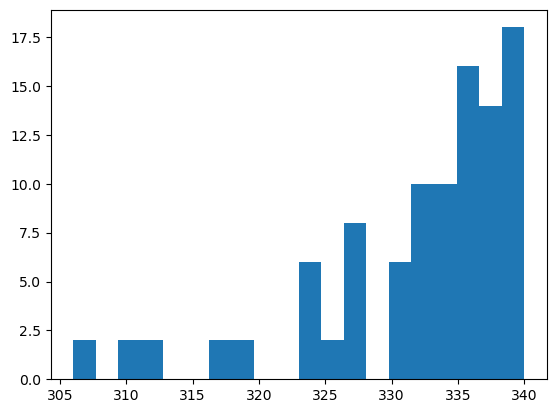

In [75]:
plt.hist(fitness1[:100],bins=20)

In [76]:
mini1

306.0

In [77]:
best1

(4, 7, 5, 8, 6, 9, 3, 2, 1, 10)

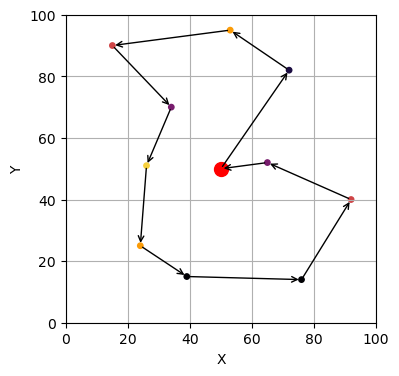

In [84]:
plot_route(best1, xy_central.T[:11], orders[:11])

## Exhaustive search: best for 10 customers, corner base

In [78]:
mini2=1000
best2=permutations[0]
fitness2=[]
for perm in permutations:
    calc=evaluate(perm,dist_corner[:11],orders[:11],max_capacity=1000)[0]
    fitness2+=[calc]
    if calc<mini2:
        mini2=calc
        best2=perm

In [79]:
fitness2.sort()

In [80]:
mini2

342.0

In [81]:
best2

(3, 2, 1, 10, 4, 7, 5, 8, 6, 9)

(array([ 2.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  2.,  2.,  2.,  4.,  2.,
        10.,  4., 12., 14.,  8., 14., 20.]),
 array([342.  , 344.45, 346.9 , 349.35, 351.8 , 354.25, 356.7 , 359.15,
        361.6 , 364.05, 366.5 , 368.95, 371.4 , 373.85, 376.3 , 378.75,
        381.2 , 383.65, 386.1 , 388.55, 391.  ]),
 <BarContainer object of 20 artists>)

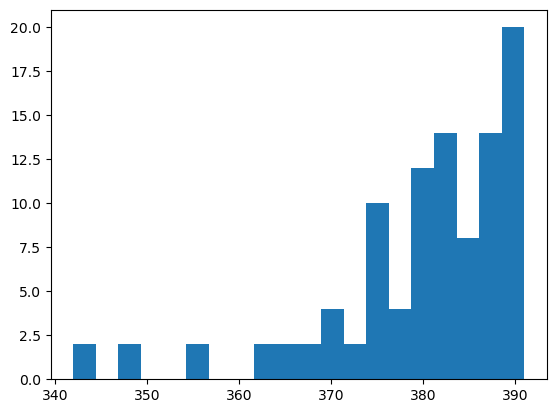

In [82]:
plt.hist(fitness2[:100],bins=20)

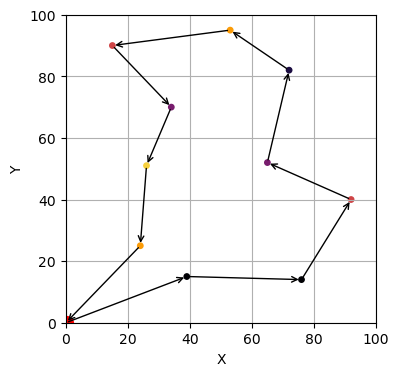

In [83]:
plot_route(best2, xy_corner.T[:11], orders[:11])

In [21]:
%%time
sols = np.vectorize(lambda I: evaluateMO(I, dist_central, orders) ,signature="(n)->(),()")(permutations)

CPU times: user 54.9 s, sys: 36.6 ms, total: 54.9 s
Wall time: 55 s


In [22]:
points = sols[0] < 400

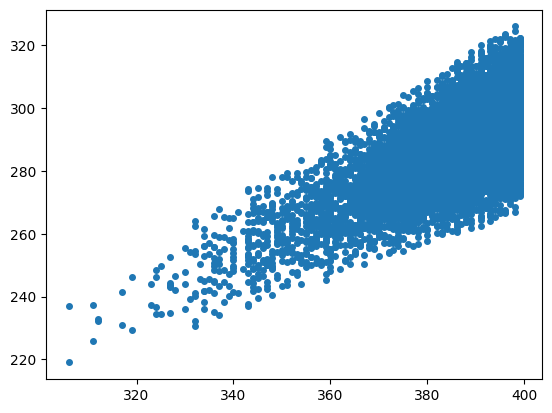

In [23]:
plt.scatter(sols[0][points], sols[1][points],s=4**2)

In [67]:
np.argsort(sols[0])

array([3266589, 1308686, 3414815, ..., 1517396, 2272276, 2595956])

In [73]:
sols[0][3266589], permutations[3266589],\
sols[0][1308686], permutations[1308686]

(306.0,
 array([10,  1,  2,  3,  9,  6,  8,  5,  7,  4]),
 306.0,
 array([ 4,  7,  5,  8,  6,  9,  3,  2,  1, 10]))

In [5]:
evaluate([23, 18,  6,  8, 19,  5, 21, 30,  7, 20,  4, 17, 28, 26, 13,
            24, 22, 15, 11,  9, 27, 10,  1, 29, 16, 12, 25,  2, 14,  3], dist_corner, orders)

(610.0,)

In [38]:
def evaluate2(individual, distances, orders, max_capacity=1000):

    dist = distances[0][individual[0]]
    capacity = max_capacity - orders[individual[0]]

    for i, f in zip(individual[:-1], individual[1:]):
        if capacity >= orders[f]:
            dist += distances[i][f]
        else:
            dist += distances[i][0] + distances[0][f]
            capacity = max_capacity

        capacity -= orders[f]
    dist += distances[0][individual[-1]]
    return (dist,)

In [27]:
%lprun -f evaluate2 evaluate2(range(1,51), dist_central, orders)

Timer unit: 1e-06 s

Total time: 0.00012 s
File: /tmp/ipykernel_1177855/1301917035.py
Function: evaluate2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def evaluate2(individual, distances, orders, max_capacity=1000):
     2                                           
     3         1          7.0      7.0      5.8      dist = distances[0, individual[0]]
     4         1          4.0      4.0      3.3      capacity = max_capacity - orders[individual[0]]
     5                                           
     6        50         18.0      0.4     15.0      for i, f in zip(individual[:-1], individual[1:]):
     7        49         20.0      0.4     16.7          if capacity >= orders[f]:
     8        47         40.0      0.9     33.3              dist += distances[i][f]
     9                                                   else:
    10         2          4.0      2.0      3.3              dist += distances[i][0

In [44]:
%%timeit
evaluate2(I, d, orders)

16.6 µs ± 465 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [33]:
%%timeit
evaluate2(range(1,51), dist_central, orders)

27.5 µs ± 1.58 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [42]:
d=dist_central.tolist()
I = list(range(1,51))

In [124]:
# def my_mut(ind):
ind = np.array(range(1,11))
cities = list(range(1, len(ind)+1))
new_ind = np.insert(ind, [0,ind.size], 0)

dists = np.array([1/(dist_central[a][b] + dist_central[b][c]) for a,b,c in zip(new_ind, new_ind[1:], new_ind[2:])])
dists /= dists.sum()

R = np.random.uniform(size=10)
R /= R.sum()

ind[R>dists] = np.random.permutation(ind[R>dists])

In [ ]:
[45.0, 61.0, 68.0, 55.0, 44.0, 47.0, 49.0, 66.0, 61.0, 62.0]

In [56]:
r = np.random.uniform(size=10)
r = r/r.sum()
r

array([0.05464732, 0.00090189, 0.00163775, 0.10709334, 0.11898825,
       0.10309815, 0.14646343, 0.21277499, 0.19273167, 0.06166321])

In [57]:
r < dists

array([ True,  True,  True, False,  True,  True, False, False, False,
        True])

In [58]:
import random

In [59]:
R = [random.uniform(0,1) for _ in range(len(ind))]
R = [r/sum(R) for r in R]
R

[0.14174498291512744,
 0.09631713249639834,
 0.14363401163461662,
 0.04832532884898938,
 0.039509325446304325,
 0.1095765969531882,
 0.15422299100263945,
 0.06875704088872311,
 0.01410420534538934,
 0.1838083844686238]

In [104]:
np.insert(ind, [1,3,5,7], [100,200,300,400])

array([ 10, 100,   1,   2, 200,   3,   9, 300,   6,   8, 400,   5,   7,
         4])

In [91]:
np.where([True,False,True,False,True,True])

(array([0, 2, 4, 5]),)

In [94]:
np.random.permutation(ind)

array([10,  5,  7,  2,  3,  4,  6,  9,  8,  1])

In [97]:
np.random.permutation(ind[R>dists])

array([ 9,  4,  1, 10])

In [101]:
np.where(R>dists)[0]

array([0, 1, 4, 9])

In [105]:
ind[2:4] = [20,100] 

In [106]:
ind

array([ 10,   1,  20, 100,   9,   6,   8,   5,   7,   4])